# Data Scientist Exploratory Analysis

Dataset fetched from Kaggle's website: https://www.kaggle.com/datasets/nikhilbhathi/data-scientist-salary-us-glassdoor?resource=download.

It has information from Glassdoor about job roles in the Data Science field.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

import re
import statsmodels.api as sm


plt.style.use('ggplot') # Command to enhance plot visualization
pd.set_option('display.max_columns', 200) # Command setting to display more columns than default pandas


df = pd.read_csv('data_cleaned_2021.csv')


In [18]:
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,48,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL,11,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,56,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,23,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,data scientist,na,na


In [13]:
df.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

In [14]:
df.shape

(742, 42)

In [15]:
df.dtypes

index                   int64
Job Title              object
Salary Estimate        object
Job Description        object
Rating                float64
Company Name           object
Location               object
Headquarters           object
Size                   object
Founded                 int64
Type of ownership      object
Industry               object
Sector                 object
Revenue                object
Competitors            object
Hourly                  int64
Employer provided       int64
Lower Salary            int64
Upper Salary            int64
Avg Salary(K)         float64
company_txt            object
Job Location           object
Age                     int64
Python                  int64
spark                   int64
aws                     int64
excel                   int64
sql                     int64
sas                     int64
keras                   int64
pytorch                 int64
scikit                  int64
tensor                  int64
hadoop    

In [ ]:
df.describe()

,index,Rating,Founded,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,469.129380,3.618868,1837.154987,0.032345,0.022911,74.754717,128.214286,101.484501,47.524259,0.528302,0.225067,0.237197,0.522911,0.512129,0.088949,0.039084,0.052561,0.072776,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868
std,279.793117,0.801210,497.183763,0.177034,0.149721,30.945892,45.128650,37.482449,53.839080,0.499535,0.417908,0.425651,0.499812,0.500190,0.284862,0.193925,0.223305,0.259944,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150
min,0.000000,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,221.500000,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,472.500000,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,25.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,707.750000,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,60.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,955.000000,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature relationships

In [ ]:
def normalize_company_size(x):
    nospaces = x.replace(" ", "")
    
    if '-' in nospaces:
        try:
            number_one, number_two = nospaces.split('-')
            size = (float(number_one) + float(number_two)) / 2
            return size
        except ValueError:
            return 0  # In case the split or conversion fails
    elif '+' in nospaces:
        return re.sub(r'[^A-Za-z0-9 ]+', '', nospaces)
    else:
        return "0"
        

In [39]:
# Salary vs Glassdoor Rating
print("Correlation: Salary vs Rating")
print(df['Avg Salary(K)'].corr(df['Rating']))

X = sm.add_constant(df['Rating'])
model_rating = sm.OLS(df['Avg Salary(K)'], X).fit()
print(model_rating.summary())

Correlation: Salary vs Rating
0.012475369441822178
                            OLS Regression Results                            
Dep. Variable:          Avg Salary(K)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1152
Date:                Sun, 06 Apr 2025   Prob (F-statistic):              0.734
Time:                        14:05:45   Log-Likelihood:                -3741.2
No. Observations:                 742   AIC:                             7486.
Df Residuals:                     740   BIC:                             7496.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

In [40]:
# Salary vs Founded Year
print("Correlation: Salary vs Founded")
print(df['Avg Salary(K)'].corr(df['Founded']))

X = sm.add_constant(df['Founded'])
model_founded = sm.OLS(df['Avg Salary(K)'], X).fit()
print(model_founded.summary())

Correlation: Salary vs Founded
-0.009609236821131234
                            OLS Regression Results                            
Dep. Variable:          Avg Salary(K)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.06834
Date:                Sun, 06 Apr 2025   Prob (F-statistic):              0.794
Time:                        14:06:06   Log-Likelihood:                -3741.2
No. Observations:                 742   AIC:                             7486.
Df Residuals:                     740   BIC:                             7496.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [41]:
# Salary vs Company Age
print("Correlation: Salary vs Age")
print(df['Avg Salary(K)'].corr(df['Age']))

X = sm.add_constant(df['Age'])
model_age = sm.OLS(df['Avg Salary(K)'], X).fit()
print(model_age.summary())


Correlation: Salary vs Age
0.02207573992333896
                            OLS Regression Results                            
Dep. Variable:          Avg Salary(K)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3608
Date:                Sun, 06 Apr 2025   Prob (F-statistic):              0.548
Time:                        14:06:35   Log-Likelihood:                -3741.1
No. Observations:                 742   AIC:                             7486.
Df Residuals:                     740   BIC:                             7495.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

In [42]:
# Salary vs Company Size
df['Size'] = df['Size'].apply(normalize_company_size)
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

print("Correlation: Salary vs Size")
print(df['Avg Salary(K)'].corr(df['Size']))

X = sm.add_constant(df['Size'])
model_size = sm.OLS(df['Avg Salary(K)'], X, missing='drop').fit()
print(model_size.summary())

Correlation: Salary vs Size
0.08093096791435381
                            OLS Regression Results                            
Dep. Variable:          Avg Salary(K)   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.879
Date:                Sun, 06 Apr 2025   Prob (F-statistic):             0.0275
Time:                        14:07:12   Log-Likelihood:                -3738.8
No. Observations:                 742   AIC:                             7482.
Df Residuals:                     740   BIC:                             7491.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

In [45]:
# Salary vs Industry
df['Industry'] = df['Industry'].astype('category').cat.codes

print("Correlation: Salary vs Industry")
print(df['Avg Salary(K)'].corr(df['Industry']))

X = sm.add_constant(df['Industry'])
model_industry = sm.OLS(df['Avg Salary(K)'], X).fit()
print(model_industry.summary())

Correlation: Salary vs Industry
-0.10318808453861326
                            OLS Regression Results                            
Dep. Variable:          Avg Salary(K)   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     7.964
Date:                Sun, 06 Apr 2025   Prob (F-statistic):            0.00490
Time:                        14:08:17   Log-Likelihood:                -3737.3
No. Observations:                 742   AIC:                             7479.
Df Residuals:                     740   BIC:                             7488.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [47]:
# Define region groupings
northeast = ["PA", "NJ", "VT", "NH", "ME", "MA", "RI", "CT", "NY"]
midwest = ["ND", "SD", "NE", "KS", "MN", "IA", "MO", "WI", "IL", "IN", "MI", "OH"]
south = ["TX", "OK", "AR", "LA", "KY", "TN", "MS", "AL", "GA", "FL",
         "SC", "NC", "VA", "WV", "MD", "DE", "DC"]
west = ["WA", "OR", "CA", "ID", "NV", "AZ", "MT", "WY", "CO", "NM", "AK", "HI", "UT"]

# Function to assign region
def assign_region(state):
    if state in northeast:
        return "Northeast"
    elif state in midwest:
        return "Midwest"
    elif state in south:
        return "South"
    elif state in west:
        return "West"
    else:
        return "Unknown"

# Apply to dataframe
df['Region'] = df['Job Location'].apply(assign_region)
df['Region'] = df['Region'].astype('category')


/var/folders/ky/wh5n3zqs7kg2rt79j8kz6bm00000gn/T/ipykernel_28329/1649436924.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


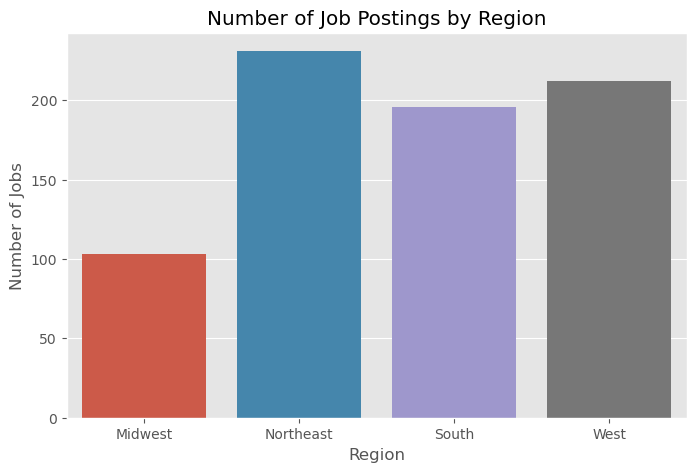

In [ ]:
# Count number of entries per region
region_counts = df['Region'].value_counts().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=region_counts, x='Region', y='count', hue='Region', dodge=False)
plt.xlabel('Region')
plt.ylabel('Number of Jobs')
plt.title('Number of Job Postings by Region')
plt.legend().remove()
plt.show()

/var/folders/ky/wh5n3zqs7kg2rt79j8kz6bm00000gn/T/ipykernel_28329/2636382273.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Region', y='Avg Salary(K)', palette='Set3')


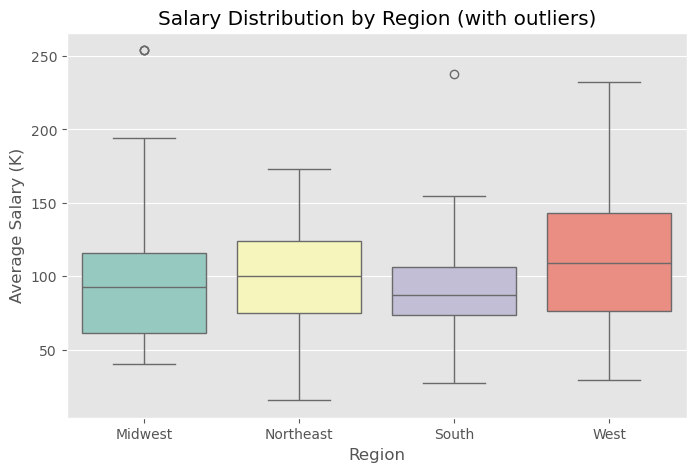

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Region', y='Avg Salary(K)', palette='Set3')
plt.xlabel('Region')
plt.ylabel('Average Salary (K)')
plt.title('Salary Distribution by Region (with outliers)')
plt.show()

In [ ]:
bigger = df['Avg Salary(K)'].max()
smaller = df['Avg Salary(K)'].min()
average = df['Avg Salary(K)'].sum() / 742  # 742 is the total number of entries

print(f"Bigger: {bigger}K")
print(f"Smaller: {smaller}K")
print(f"Average: {round(average, 2)}K")


Bigger: 254.0K
Smaller: 15.5K
Average: 101.48K


In [ ]:
def classify_salary(salary):
    if salary <= 80:
        return "Low"
    elif salary <= 160:
        return "Average"
    else:
        return "High"

# Apply classification
df['Salary_Classification'] = df['Avg Salary(K)'].apply(classify_salary)
df['Salary_Classification'] = pd.Categorical(df['Salary_Classification'], categories=["Low", "Average", "High"])

/var/folders/ky/wh5n3zqs7kg2rt79j8kz6bm00000gn/T/ipykernel_28329/3875538014.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


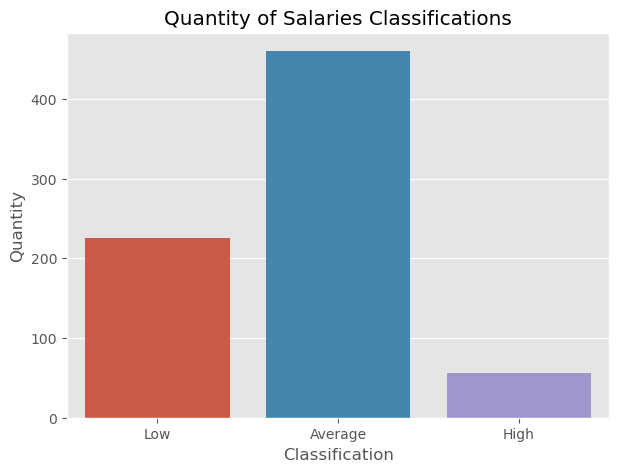

In [66]:
# Count salary classifications
classified_counts = df['Salary_Classification'].value_counts().reset_index()
classified_counts.columns = ['Salary_Classification', 'Count']

# Plot
plt.figure(figsize=(7, 5))
sns.barplot(data=classified_counts, x='Salary_Classification', y='Count', hue='Salary_Classification', dodge=False)
plt.xlabel("Classification")
plt.ylabel("Quantity")
plt.title("Quantity of Salaries Classifications")
plt.legend().remove()
plt.show()

/var/folders/ky/wh5n3zqs7kg2rt79j8kz6bm00000gn/T/ipykernel_28329/1144807089.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Region', 'Salary_Classification'])['Avg Salary(K)'].mean().reset_index()


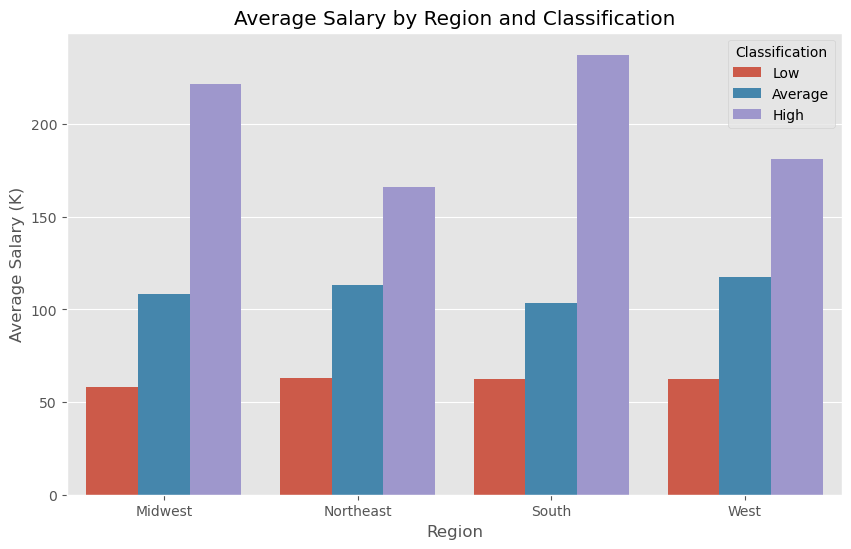

In [80]:
# Group by Region and Salary Classification, calculate average salary
grouped = df.groupby(['Region', 'Salary_Classification'])['Avg Salary(K)'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='Region', y='Avg Salary(K)', hue='Salary_Classification')
plt.xlabel("Region")
plt.ylabel("Average Salary (K)")
plt.title("Average Salary by Region and Classification")
plt.legend(title="Classification")
plt.show()


# Data Prediction

In [ ]:
def predict_salary(X, Y, test):
    # Fit the linear model: Y ~ X
    X_with_const = sm.add_constant(X)
    model = sm.OLS(Y, X_with_const).fit()

    intercept, slope = model.params
    prediction = intercept + slope * test

    return prediction

In [ ]:
# Convert Job Location to numeric codes
df['Job Location Code'] = df['Job Location'].astype('category').cat.codes

# Predict salaries
X = df['Job Location Code']
Y = df['Avg Salary(K)']

ny_prediction = predict_salary(X, Y, test=26)
ca_prediction = predict_salary(X, Y, test=8)

print(f"Predicted salary for NY (code 26): {round(ny_prediction, 2)}K")
print(f"Predicted salary for CA (code 8): {round(ca_prediction, 2)}K")

Predicted salary for NY (code 26): 95.39K
Predicted salary for CA (code 8): 107.13K


In [78]:
# OR
from sklearn.linear_model import LinearRegression
import numpy as np

def predict_salary_easy(X, Y, test_value):
    model = LinearRegression()
    X = np.array(X).reshape(-1, 1)
    Y = np.array(Y)
    
    model.fit(X, Y)
    prediction = model.predict([[test_value]])
    
    return prediction[0]

In [79]:
X = df['Job Location'].astype('category').cat.codes
Y = df['Avg Salary(K)']

ny_code = 26
ca_code = 8

ny_prediction = predict_salary_easy(X, Y, ny_code)
ca_prediction = predict_salary_easy(X, Y, ca_code)

print(f"Predicted salary for NY (code {ny_code}): {round(ny_prediction, 2)}K")
print(f"Predicted salary for CA (code {ca_code}): {round(ca_prediction, 2)}K")


Predicted salary for NY (code 26): 95.39K
Predicted salary for CA (code 8): 107.13K


Accuracy using skill variables: 64.1256%


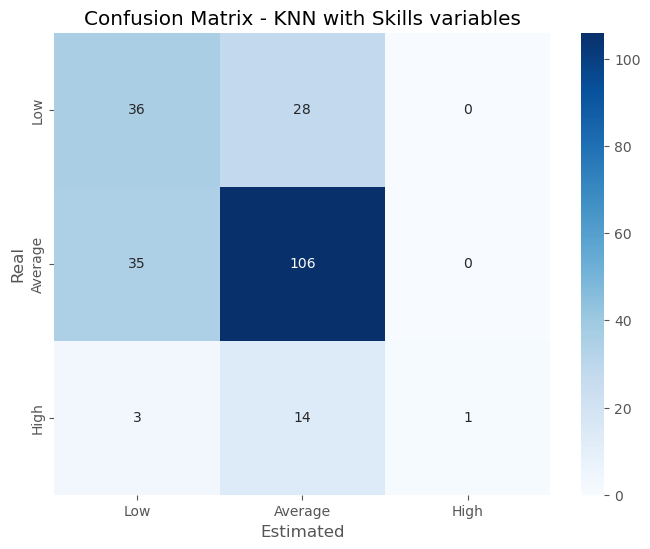

In [ ]:
# KNN Classification

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Select skill columns to normalize
skill_columns = [
    "Python", "spark", "aws", "excel", "sql", "sas", "keras", "pytorch",
    "scikit", "tensor", "hadoop", "tableau", "bi", "flink", "mongo", "google_an"
]

# Normalize skill features
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df[skill_columns])
normalized_df = pd.DataFrame(normalized_data, columns=skill_columns)

# Train-test split (70% training)
np.random.seed(42)  # for reproducibility
sample_indices = np.random.choice(df.index, size=int(0.7 * len(df)), replace=False)

train_df = normalized_df.loc[sample_indices]
test_df = normalized_df.drop(sample_indices)

train_labels = df.loc[sample_indices, 'Salary_Classification']
test_labels = df.loc[~df.index.isin(sample_indices), 'Salary_Classification']

# KNN classification
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(train_df, train_labels)
predicted = knn.predict(test_df)

# Accuracy and confusion matrix
accuracy = accuracy_score(test_labels, predicted) * 100
print(f"Accuracy using skill variables: {round(accuracy, 4)}%")

conf_matrix = confusion_matrix(test_labels, predicted, labels=["Low", "Average", "High"])
conf_df = pd.DataFrame(conf_matrix, index=["Low", "Average", "High"], columns=["Low", "Average", "High"])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Estimated")
plt.ylabel("Real")
plt.title("Confusion Matrix - KNN with Skills variables")
plt.show()
